In [111]:
# Subword level similarities

In [1]:
import os, sys
sys.path.append("../")
from crawled_data import CrawledData
from collections import Counter
from itertools import combinations
import pandas as pd
import math
import json
import string
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import entropy

In [2]:
# Read data

In [3]:
data_obj = CrawledData()
data_obj.read_crawled_data("../data/crawled/folksongs/", remove_punctuation = True)
print(data_obj.data.keys())
data_obj.read_crawled_data("../data/crawled/poetry/", remove_punctuation = True)
print(data_obj.data.keys())
acc_data = dict()


Getting files for rajasthani
Getting files for gujarati
Getting files for himachali
Getting files for hindi-urdu
Getting files for magahi
Getting files for awadhi
Getting files for punjabi
Getting files for koraku
Getting files for baiga
Getting files for .DS_Store
Getting files for nimaadi
Getting files for khadi_boli
Getting files for bhojpuri
Getting files for garwali
Getting files for chattisgarhi
Getting files for brajbhasha
Getting files for bhil
Getting files for sanskrit
Getting files for angika
Getting files for hariyanvi
Getting files for kannauji
Getting files for bundeli
Getting files for bangla
Getting files for malwi
Getting files for marathi
Getting files for kumaoni
Getting files for bhadavari
dict_keys(['rajasthani', 'gujarati', 'himachali', 'hindi-urdu', 'magahi', 'awadhi', 'punjabi', 'koraku', 'baiga', 'nimaadi', 'khadi_boli', 'bhojpuri', 'garwali', 'chattisgarhi', 'brajbhasha', 'bhil', 'sanskrit', 'angika', 'hariyanvi', 'kannauji', 'bundeli', 'bangla', 'malwi', 'mar

In [4]:
langs = [
"sindhi",
"rajasthani",
"punjabi",
"hariyanvi",
#"gujarati",
"khadi_boli",
"sanskrit",
"hindi-urdu",
"bhil",
"koraku",
"baiga",
"nimaadi",
"malwi",
"marathi",
"bhadavari",
"himachali",
"garwali",
"kumaoni",
"kannauji",
"brajbhasha",
"bundeli",
"awadhi",
"chattisgarhi",
"nepali",
"pali",
"bhojpuri",
"bajjika",
"magahi",
"maithili",
"angika",
#"bangla"
        ]

north = ["sindhi", "punjabi", "hariyanvi", "bhadavari", "himachali", "garwali", "kumaoni", "kannauji", "nepali"]
north_central = ["sindhi", "rajasthani", "punjabi", "hariyanvi", "hindi-urdu", "khadi_boli", "kannauji", "brajbhasha", "bundeli", \
                "awadhi", "chattisgarhi", "bhojpuri", "bajjika", "magahi", "maithili", "angika"]
central = ["rajasthani", "hindi-urdu", "gujarati", "bhil", "koraku", "baiga", "nimaadi", "malwi", "marathi", "chattisgarhi"]

# langs = [lang for lang in langs if lang in north_central]

for idx, lang in enumerate(langs):
    print(idx, lang)

0 sindhi
1 rajasthani
2 punjabi
3 hariyanvi
4 khadi_boli
5 sanskrit
6 hindi-urdu
7 bhil
8 koraku
9 baiga
10 nimaadi
11 malwi
12 marathi
13 bhadavari
14 himachali
15 garwali
16 kumaoni
17 kannauji
18 brajbhasha
19 bundeli
20 awadhi
21 chattisgarhi
22 nepali
23 pali
24 bhojpuri
25 bajjika
26 magahi
27 maithili
28 angika


In [5]:
# Cleaning accumulated data
dev_range = range(2305, 2404)
for lang in langs:
    acc_data[lang] = " ".join([data_obj.data[lang][file_id]["text"] for file_id in data_obj.data[lang]])
    acc_data[lang] = "".join([c if ord(c) in dev_range else " " for c in acc_data[lang]])
    acc_data[lang] = " ".join(acc_data[lang].split())


In [6]:
lang_by_char = dict()
bad_chars = ["\n", "\t", " "]
for lang in langs:
    lang_by_char[lang] = Counter(acc_data[lang])
#     total = sum(lang_by_char[lang].values())
#     for key, val in lang_by_char[lang].items():
#         lang_by_char[lang][key] = round(val*100/total, 3)
    for bad_char in bad_chars:
        del lang_by_char[lang][bad_char] 

In [7]:
N = len(langs)
shared_lex_metrics = [[0]*N for _ in range(N)]


for i, j in combinations(range(N), 2):
    l_1, l_2 = langs[i], langs[j]
    lex_l_1, lex_l_2 = set(lang_by_char[l_1].keys()), set(lang_by_char[l_2].keys())
    shared_lex = lex_l_1.union(lex_l_2)
    l_1_dist = [lang_by_char[l_1][c] if c in lang_by_char[l_1] else 1e-6 for c in shared_lex]
    l_2_dist = [lang_by_char[l_2][c] if c in lang_by_char[l_2] else 1e-6 for c in shared_lex]
    klp = (entropy(pk = l_1_dist, qk = l_2_dist) + entropy(pk = l_2_dist, qk = l_1_dist))/2
    shared_lex_metrics[i][j] = shared_lex_metrics[j][i] = klp 
    
for i in range(N):
    shared_lex_metrics[i][i] = 0
    
shared_lex_metrics = np.asarray(shared_lex_metrics)
max_sim = max(shared_lex_metrics.flatten())

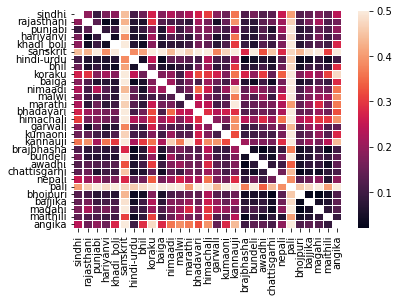

In [9]:
ax = sns.heatmap(shared_lex_metrics, linewidth=0.3, mask = shared_lex_metrics == 0, vmax = 0.5, xticklabels=langs, yticklabels=langs)#, annot=True, annot_kws={"size":6})
fig = ax.get_figure()
fig.savefig("stats_outputs/all_charlevel_klp.png", bbox_inches = "tight")

In [39]:
# investigating subword similarity
len(set(lang_cgrams[3]["bhadavari"].keys()))



1139

In [150]:
# KL Divergence
N = len(langs)    
find_range = range(3,5)
klp_total = np.zeros((N,N))
for window in find_range:
    klp_total += find_shared_cgrams(langs, lang_cgrams, window, kl = True)

klp_total = klp_total/len(find_range)

In [70]:
klp_total[0,1]

1.0155788635877205